In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px

In [4]:
#Cancellation analysis

In [92]:
# Load the csv file of the clean data
df = pd.read_csv('data\\processed\\cancellations_cleaned.csv')
dfr = pd.read_csv('data\\processed\\retail_cleaned.csv')

In [8]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,C489449,22087,PAPER BUNTING WHITE LACE,12,2009-12-01 10:33:00,2.95,16321,Australia
1,C489449,85206A,CREAM FELT EASTER EGG BASKET,6,2009-12-01 10:33:00,1.65,16321,Australia
2,C489449,21895,POTTING SHED SOW 'N' GROW SET,4,2009-12-01 10:33:00,4.25,16321,Australia
3,C489449,21896,POTTING SHED TWINE,6,2009-12-01 10:33:00,2.10,16321,Australia
4,C489449,22083,PAPER CHAIN KIT RETRO SPOT,12,2009-12-01 10:33:00,2.95,16321,Australia
...,...,...,...,...,...,...,...,...
17214,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,12,2011-12-09 09:57:00,1.95,14397,United Kingdom
17215,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,11,2011-12-09 09:57:00,0.83,14397,United Kingdom
17216,C581568,21258,VICTORIAN SEWING BOX LARGE,5,2011-12-09 11:57:00,10.95,15311,United Kingdom
17217,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [10]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
17214,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,12,2011-12-09 09:57:00,1.95,14397,United Kingdom
17215,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,11,2011-12-09 09:57:00,0.83,14397,United Kingdom
17216,C581568,21258,VICTORIAN SEWING BOX LARGE,5,2011-12-09 11:57:00,10.95,15311,United Kingdom
17217,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,1,2011-12-09 11:58:00,1.25,17315,United Kingdom
17218,C581569,20979,36 PENCILS TUBE RED RETROSPOT,5,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [12]:
#retail Cancellation Rate per orders

In [14]:
cancelled_orders = df['Invoice'].nunique()
valid_orders = dfr['Invoice'].nunique() 
print(cancelled_orders, valid_orders)

7216 39287


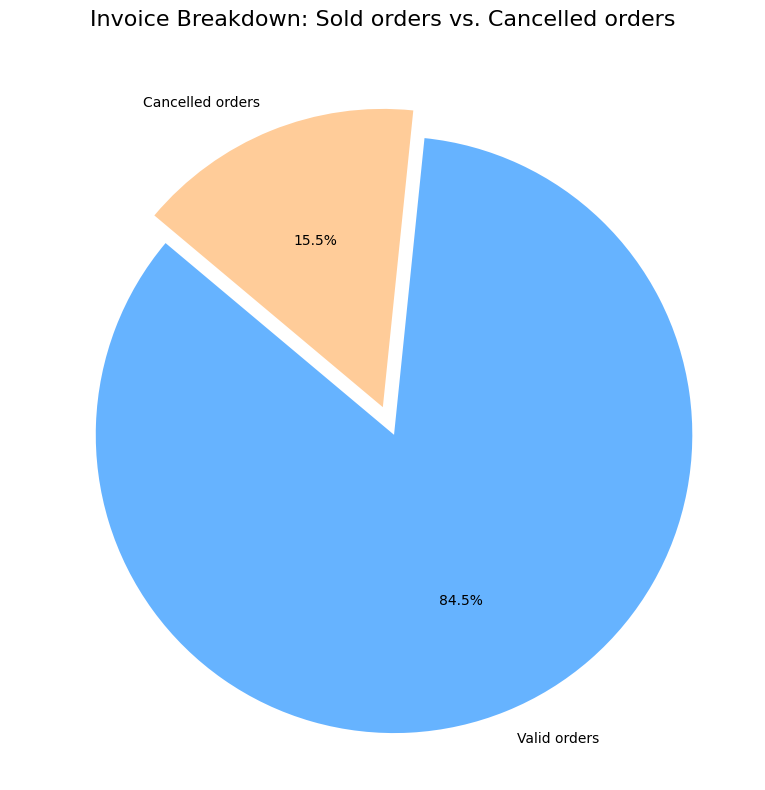

In [16]:
plt.figure(figsize=(8, 8))
plt.pie(
    [valid_orders, cancelled_orders],
    labels=['Valid orders', 'Cancelled orders'],
    autopct='%1.1f%%', 
    startangle=140,    
    colors=['#66b3ff', '#ffcc99'], 
    explode=(0.1, 0)    
)
plt.title('Invoice Breakdown: Sold orders vs. Cancelled orders', fontsize=16)
plt.tight_layout()
plt.savefig("graphs\\Invoice Breakdown Sold Orders vs Cancelled Orders")
plt.show()

In [18]:
Cancellation_Rate = cancelled_orders/(valid_orders+cancelled_orders) *100
print("cancelation rate is", Cancellation_Rate,"%")

cancelation rate is 15.51727845515343 %


In [20]:
#avrage transaction count per order
#cancellations
avg_trans_per_cancellation = df.groupby('Invoice').size().mean()
print(avg_trans_per_cancellation)

2.3862250554323725


In [22]:
#valid orders
avg_trans_per_order = dfr.groupby('Invoice').size().mean()
print(avg_trans_per_order)

24.693842746964645


In [24]:
#adjusted cancellation rate 
adjusted_cancellation_Rate = (cancelled_orders*avg_trans_per_cancellation)/((valid_orders*avg_trans_per_order)+(cancelled_orders*avg_trans_per_cancellation)) *100
print(adjusted_cancellation_Rate)

1.7439328475965348


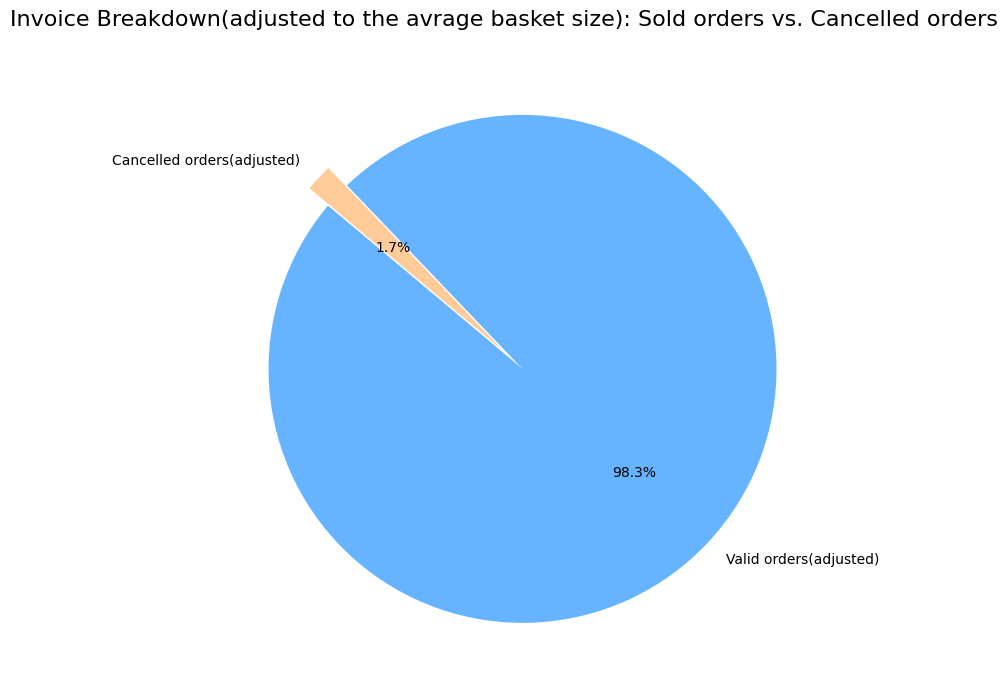

In [26]:
plt.figure(figsize=(8, 8))
plt.pie(
    [100-adjusted_cancellation_Rate, adjusted_cancellation_Rate],
    labels=['Valid orders(adjusted)', 'Cancelled orders(adjusted)'],
    autopct='%1.1f%%', 
    startangle=140,    
    colors=['#66b3ff', '#ffcc99'], 
    explode=(0.1, 0)    
)
plt.title('Invoice Breakdown(adjusted to the avrage basket size): Sold orders vs. Cancelled orders', fontsize=16)
plt.tight_layout()
plt.savefig("graphs\\Invoice Breakdown(adjusted to the avrage basket size) Sold Orders vs Cancelled Orders")
plt.show()

In [28]:
cancellation_by_product = df.groupby('StockCode').size()
valid_orders_by_product = dfr.groupby('StockCode').size()

In [30]:
#Cancellation by Product
cancellation_by_product.sort_values(ascending=False).head(20)

StockCode
22423     339
22138     209
21232     182
21843     151
85123A    129
79323W    123
21527     114
22197      87
22960      87
79323P     84
20914      83
82483      82
85099B     75
20725      73
22720      73
21231      71
37449      70
22617      67
21314      65
22467      65
dtype: int64

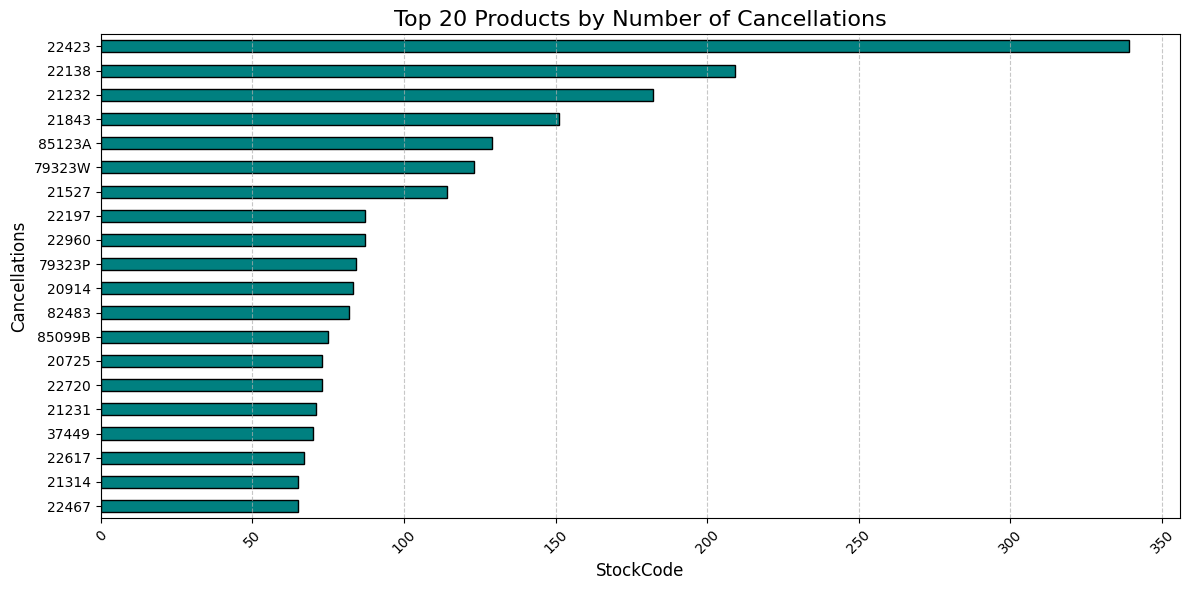

In [32]:
plt.figure(figsize=(12, 6))
cancellation_by_product.sort_values(ascending=False).head(20)[::-1].plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 20 Products by Number of Cancellations', fontsize=16)
plt.xlabel('StockCode', fontsize=12)
plt.ylabel('Cancellations', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('graphs\\Top 20 Products by number of cancellations')
plt.show()

In [33]:
#Cancellation by Product_rate
cancellation_by_product_rate = cancellation_by_product / ( valid_orders_by_product+cancellation_by_product)*100
cancellation_by_product_rate.dropna(inplace=True)
cancellation_by_product_rate.sort_values(ascending=False).head(20)

StockCode
79340W    83.333333
79301     80.000000
47567     66.666667
85069     66.666667
85043     60.000000
21496     50.000000
20885     50.000000
21475     50.000000
85218     50.000000
22003     50.000000
35976B    50.000000
20822     50.000000
47569     50.000000
79323B    46.788991
37451     40.000000
78056     40.000000
84611B    33.333333
44217M    33.333333
79065A    33.333333
21685     33.333333
dtype: float64

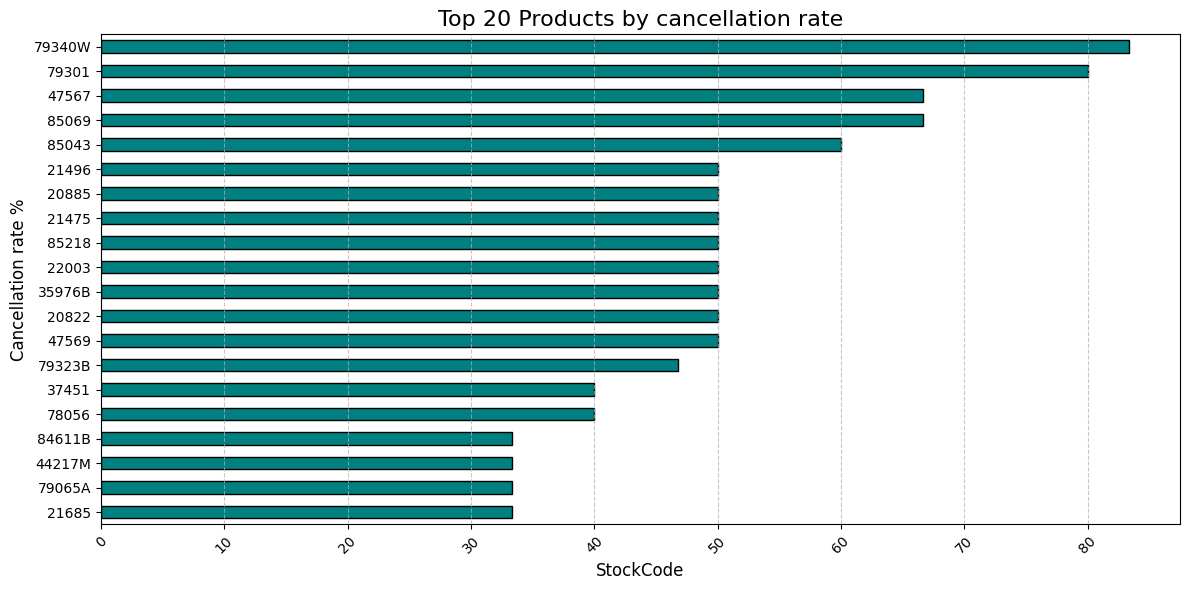

In [36]:
plt.figure(figsize=(12, 6))
cancellation_by_product_rate.sort_values(ascending=False).head(20)[::-1].plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 20 Products by cancellation rate', fontsize=16)
plt.xlabel('StockCode', fontsize=12)
plt.ylabel('Cancellation rate %', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('graphs\\Top 20 Products by cancellation rate')
plt.show()

In [37]:
cancellation_by_customer = df.groupby('Customer ID')['Invoice'].nunique()
valid_orders_by_customer = dfr.groupby('Customer ID')['Invoice'].nunique()
print(valid_orders_by_customer)

Customer ID
12346         2
12347         8
12348         4
12349         3
12350         1
           ... 
18284         1
18285         1
18286         2
18287         7
Unknown    4293
Name: Invoice, Length: 5759, dtype: int64


In [40]:
#Cancellation by customer
cancellation_by_customer.sort_values(ascending=False).drop('Unknown').head(20)

Customer ID
14911    93
17841    76
14606    66
15311    61
12471    49
13089    43
13078    38
17677    36
14156    34
13093    32
12921    29
14680    28
13534    25
18223    25
12474    23
17511    23
13767    23
13113    22
16133    22
17696    21
Name: Invoice, dtype: int64

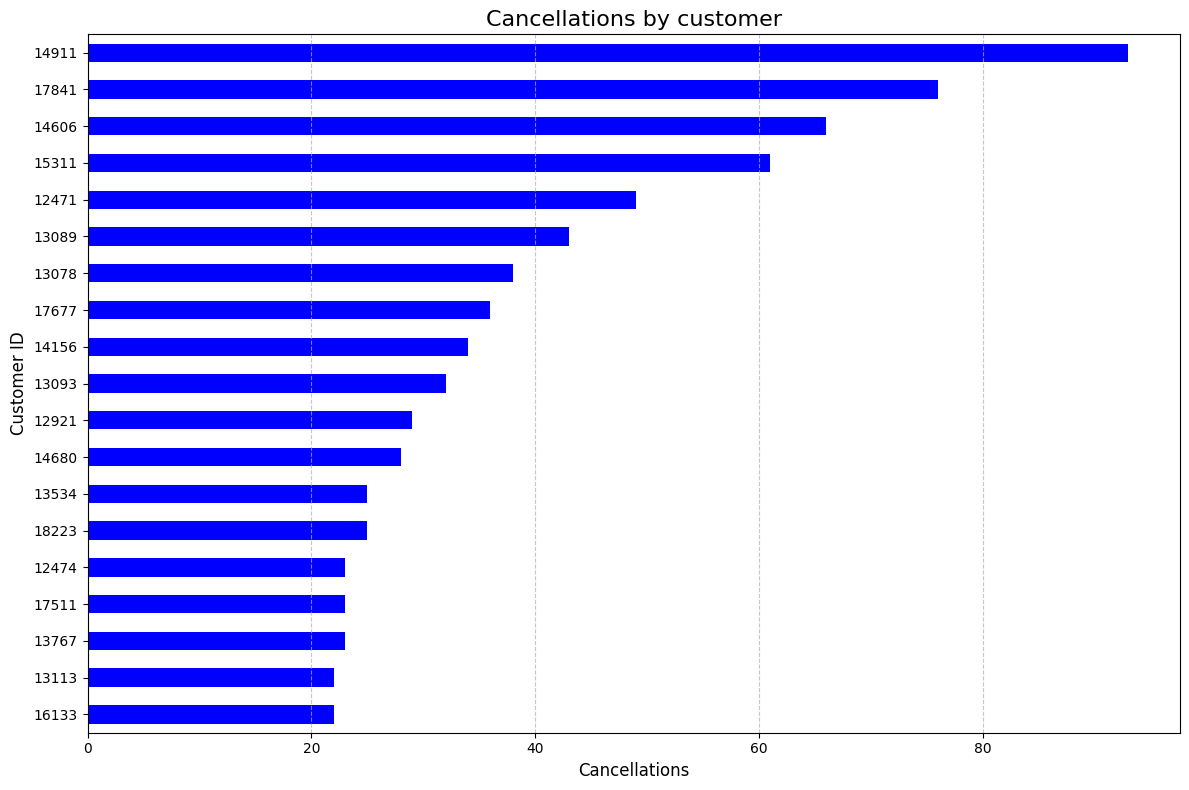

In [42]:
plt.figure(figsize=(12, 8))
cancellation_by_customer.sort_values(ascending=False).head(20).drop('Unknown')[::-1].plot(kind='barh', color='blue')
plt.title('Cancellations by customer', fontsize=16)
plt.xlabel('Cancellations', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('graphs\\Cancellations by customer')
plt.show()

In [44]:
#Cancellation by customer rate
cancellation_by_customer_rate = cancellation_by_customer / ( valid_orders_by_customer+cancellation_by_customer)
cancellation_by_customer_rate.dropna(inplace=True)
cancellation_by_customer_rate.sort_values(ascending=False)

Customer ID
12679    0.833333
16118    0.800000
13768    0.750000
12590    0.750000
14777    0.750000
           ...   
17850    0.025157
12682    0.019608
17961    0.019608
12971    0.017391
14298    0.012821
Name: Invoice, Length: 2382, dtype: float64

In [46]:
#Cancellation by customer rate adjusted
cancellation_by_customer_rate = (cancellation_by_customer*avg_trans_per_cancellation) / ( (valid_orders_by_customer*avg_trans_per_order)+(cancellation_by_customer*avg_trans_per_cancellation)) *100
cancellation_by_customer_rate.dropna(inplace=True)
cancellation_by_customer_rate.sort_values(ascending=False).head(20)

Customer ID
12679    32.576480
16118    27.877484
13768    22.474440
12590    22.474440
14777    22.474440
12770    19.457529
16396    16.196303
13281    16.196303
14149    16.196303
13257    16.196303
17820    16.196303
17693    16.196303
12533    16.196303
16148    16.196303
12746    16.196303
16061    16.196303
16297    16.196303
12797    16.196303
17599    16.196303
12479    16.196303
Name: Invoice, dtype: float64

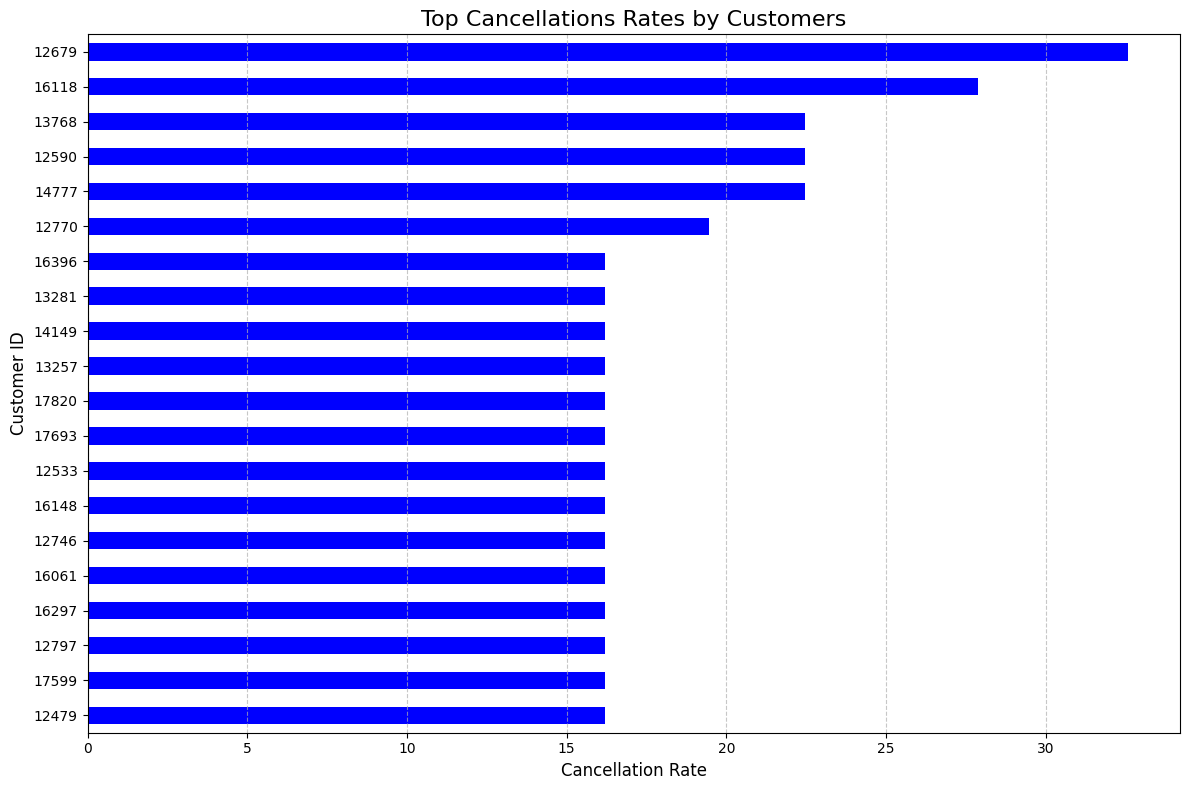

In [48]:
plt.figure(figsize=(12, 8))
cancellation_by_customer_rate.sort_values(ascending=False).head(20)[::-1].plot(kind='barh', color='blue')
plt.title('Top Cancellations Rates by Customers', fontsize=16)
plt.xlabel('Cancellation Rate', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('graphs\\Top 20 Cancellations Rates by Customers')
plt.show()

In [50]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
dfr['InvoiceDate'] = pd.to_datetime(dfr['InvoiceDate'])
dfr['Month'] = dfr['InvoiceDate'].dt.to_period('M')

In [52]:
filtered_df = df[df['Month'] != '2009-12']
filtered_dfr = dfr[dfr['Month'] != '2009-12']

In [54]:
filtered_df['Quarter'] = filtered_df['InvoiceDate'].dt.to_period('Q')
filtered_df['Year'] = filtered_df['InvoiceDate'].dt.to_period('Y')
filtered_dfr['Quarter'] = filtered_dfr['InvoiceDate'].dt.to_period('Q')
filtered_dfr['Year'] = filtered_dfr['InvoiceDate'].dt.to_period('Y')

C:\Users\user\AppData\Local\Temp\ipykernel_13792\3810171460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Quarter'] = filtered_df['InvoiceDate'].dt.to_period('Q')
C:\Users\user\AppData\Local\Temp\ipykernel_13792\3810171460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['InvoiceDate'].dt.to_period('Y')
C:\Users\user\AppData\Local\Temp\ipykernel_13792\3810171460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [56]:
#Cancellation Rate by Month
cancelled_monthly_orders = df.groupby('Month')['Invoice'].nunique()
monthly_orders = dfr.groupby('Month')['Invoice'].nunique()
cancelled_monthly_orders_rate = cancelled_monthly_orders/(cancelled_monthly_orders + monthly_orders) * 100
cancelled_monthly_orders_rate

Month
2009-12    18.128655
2010-01    18.398768
2010-02    15.024805
2010-03    17.279597
2010-04    15.227818
2010-05    19.661734
2010-06    16.291252
2010-07    17.160425
2010-08    14.347026
2010-09    15.048544
2010-10    15.047619
2010-11    16.476748
2010-12    15.923913
2011-01    18.521341
2011-02    14.876691
2011-03    16.076611
2011-04    14.532872
2011-05    13.827550
2011-06    16.183036
2011-07    13.397129
2011-08    15.110246
2011-09    14.038462
2011-10    13.170519
2011-11    12.201338
2011-12    14.392324
Freq: M, Name: Invoice, dtype: float64

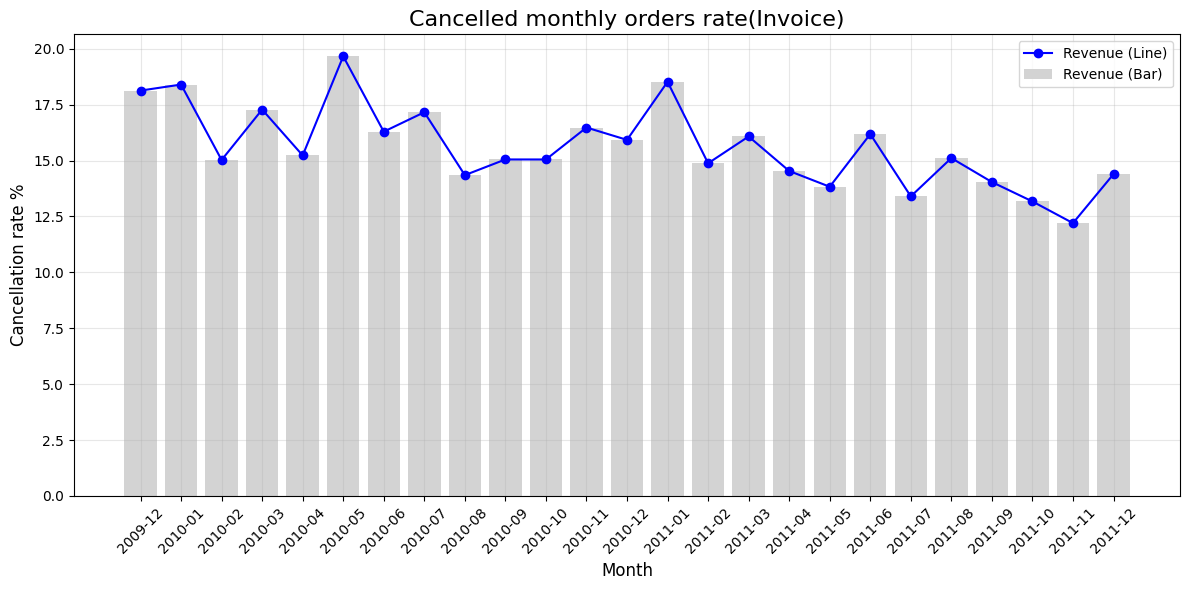

In [58]:
plt.figure(figsize=(12, 6))
plt.bar(cancelled_monthly_orders_rate.index.astype(str), cancelled_monthly_orders_rate.values, color='lightgray', label='Revenue (Bar)')
plt.plot(cancelled_monthly_orders_rate.index.astype(str), cancelled_monthly_orders_rate.values, marker='o', color='b', label='Revenue (Line)')
plt.title('Cancelled monthly orders rate(Invoice)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cancellation rate %', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('graphs\\Cancelled monthly orders rate(Invoice)')
plt.show()

In [60]:
#adjusted Cancellation Rate by Month
avg_trans_per_cancellation_by_month = df.groupby(['Month','Invoice']).size().mean()
print(avg_trans_per_cancellation_by_month)
avg_trans_per_order_by_month = dfr.groupby(['Month','Invoice']).size().mean()
print(avg_trans_per_order_by_month)
adjusted_cancelled_monthly_orders_rate = (cancelled_monthly_orders*avg_trans_per_cancellation_by_month)/((cancelled_monthly_orders*avg_trans_per_cancellation_by_month) + (monthly_orders*avg_trans_per_order_by_month)) * 100
adjusted_cancelled_monthly_orders_rate

2.3862250554323725
24.693842746964645


Month
2009-12    2.094892
2010-01    2.132328
2010-02    1.679893
2010-03    1.978629
2010-04    1.706212
2010-05    2.310313
2010-06    1.845928
2010-07    1.962480
2010-08    1.592828
2010-09    1.682965
2010-10    1.682846
2010-11    1.870621
2010-12    1.797312
2011-01    2.149388
2011-02    1.660762
2011-03    1.817475
2011-04    1.616579
2011-05    1.526923
2011-06    1.831566
2011-07    1.472849
2011-08    1.690957
2011-09    1.553595
2011-10    1.444571
2011-11    1.325101
2011-12    1.598609
Freq: M, Name: Invoice, dtype: float64

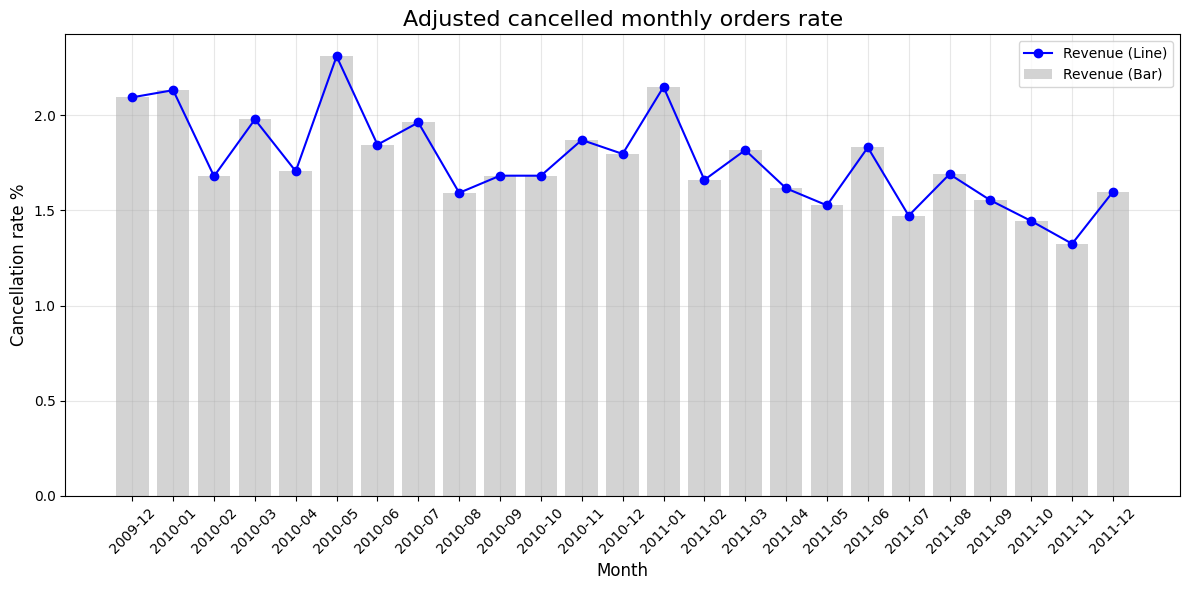

In [62]:
plt.figure(figsize=(12, 6))
plt.bar(adjusted_cancelled_monthly_orders_rate.index.astype(str), adjusted_cancelled_monthly_orders_rate.values, color='lightgray', label='Revenue (Bar)')
plt.plot(adjusted_cancelled_monthly_orders_rate.index.astype(str), adjusted_cancelled_monthly_orders_rate.values, marker='o', color='b', label='Revenue (Line)')
plt.title('Adjusted cancelled monthly orders rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cancellation rate %', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('graphs\\Adjusted cancelled monthly orders rate(Invoice)')
plt.show()

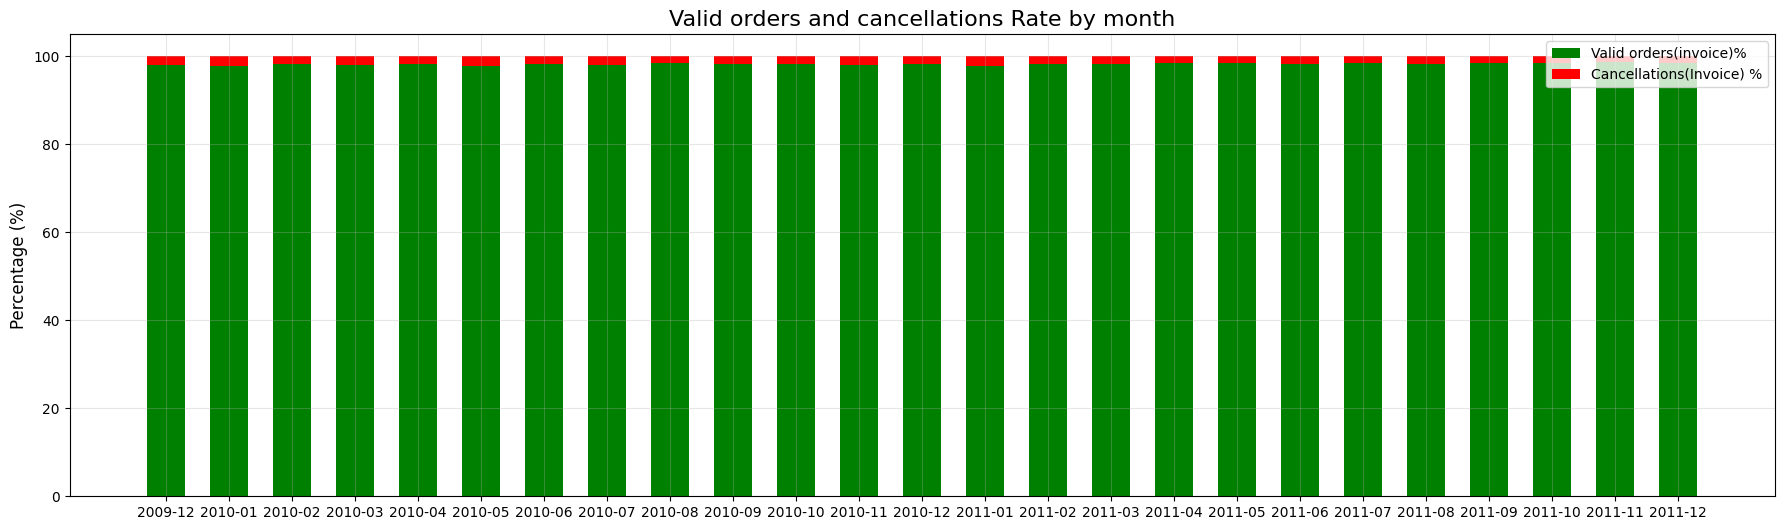

In [64]:
plt.figure(figsize=(22, 6))
bar_width = 0.6
plt.bar(adjusted_cancelled_monthly_orders_rate.index.astype(str), 100-adjusted_cancelled_monthly_orders_rate, color='green', label='Valid orders(invoice)%', width=bar_width)
plt.bar(adjusted_cancelled_monthly_orders_rate.index.astype(str), adjusted_cancelled_monthly_orders_rate.values, bottom=100-adjusted_cancelled_monthly_orders_rate, color='red', label='Cancellations(Invoice) %', width=bar_width)
plt.title('Valid orders and cancellations Rate by month', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
#plt.tight_layout()
plt.show()

In [66]:
#Cancellation Rate by quarter
cancelled_quarterly_orders = filtered_df.groupby('Quarter')['Invoice'].nunique()
quarterly_orders = filtered_dfr.groupby('Quarter')['Invoice'].nunique()
cancelled_quarterly_orders_rate = cancelled_quarterly_orders/(cancelled_quarterly_orders + quarterly_orders) * 100
cancelled_quarterly_orders_rate

Quarter
2010Q1    16.911608
2010Q2    17.132931
2010Q3    15.529197
2010Q4    15.858402
2011Q1    16.472507
2011Q2    14.847247
2011Q3    14.148092
2011Q4    12.872841
Freq: Q-DEC, Name: Invoice, dtype: float64

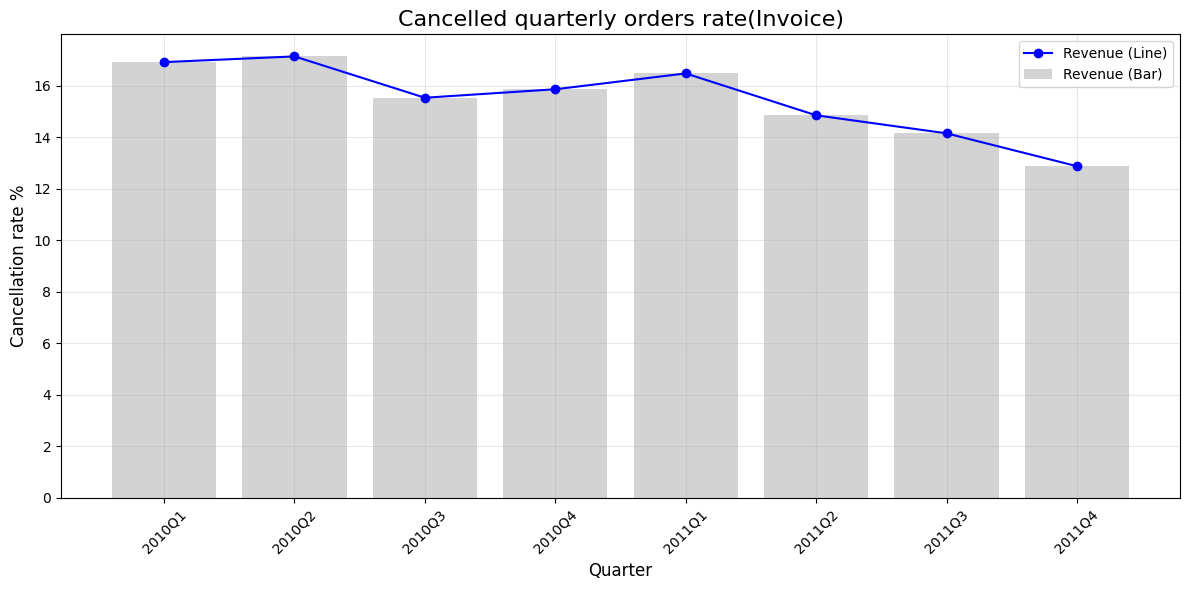

In [68]:
plt.figure(figsize=(12, 6))
plt.bar(cancelled_quarterly_orders_rate.index.astype(str), cancelled_quarterly_orders_rate.values, color='lightgray', label='Revenue (Bar)')
plt.plot(cancelled_quarterly_orders_rate.index.astype(str), cancelled_quarterly_orders_rate.values, marker='o', color='b', label='Revenue (Line)')
plt.title('Cancelled quarterly orders rate(Invoice)', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Cancellation rate %', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('graphs\\Cancelled quarterly orders rate(Invoice)')
plt.show()

In [70]:
#adjusted Cancellation Rate by Month
avg_trans_per_cancellation_by_quarter = filtered_df.groupby(['Quarter','Invoice']).size().mean()
print(avg_trans_per_cancellation_by_quarter)
avg_trans_per_order_by_quarter = filtered_dfr.groupby(['Quarter','Invoice']).size().mean()
print(avg_trans_per_order_by_quarter)
adjusted_cancelled_quarterly_orders_rate = (cancelled_quarterly_orders*avg_trans_per_cancellation_by_quarter)/((cancelled_quarterly_orders*avg_trans_per_cancellation_by_quarter) + (quarterly_orders*avg_trans_per_order_by_quarter)) * 100
adjusted_cancelled_quarterly_orders_rate

2.3777030976037405
24.6806711516473


Quarter
2010Q1    1.923144
2010Q2    1.952922
2010Q3    1.740278
2010Q4    1.783341
2011Q1    1.864478
2011Q2    1.652013
2011Q3    1.562816
2011Q4    1.403406
Freq: Q-DEC, Name: Invoice, dtype: float64

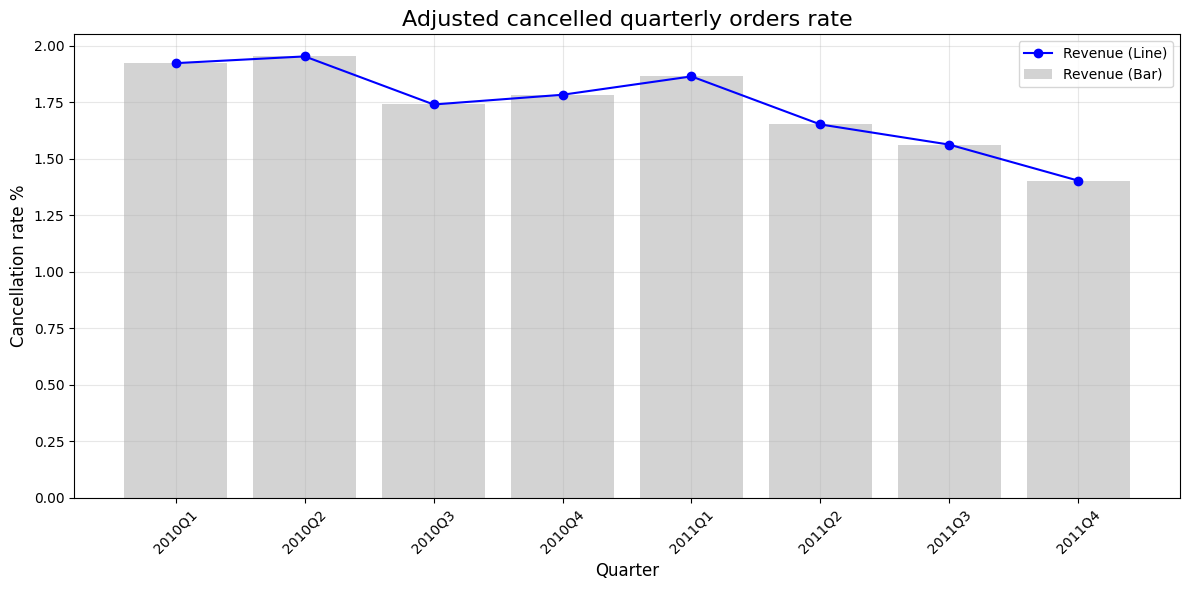

In [72]:
plt.figure(figsize=(12, 6))
plt.bar(adjusted_cancelled_quarterly_orders_rate.index.astype(str), adjusted_cancelled_quarterly_orders_rate.values, color='lightgray', label='Revenue (Bar)')
plt.plot(adjusted_cancelled_quarterly_orders_rate.index.astype(str), adjusted_cancelled_quarterly_orders_rate.values, marker='o', color='b', label='Revenue (Line)')
plt.title('Adjusted cancelled quarterly orders rate', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Cancellation rate %', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('graphs\\Adjusted cancelled quarterly orders rate(Invoice)')
plt.show()

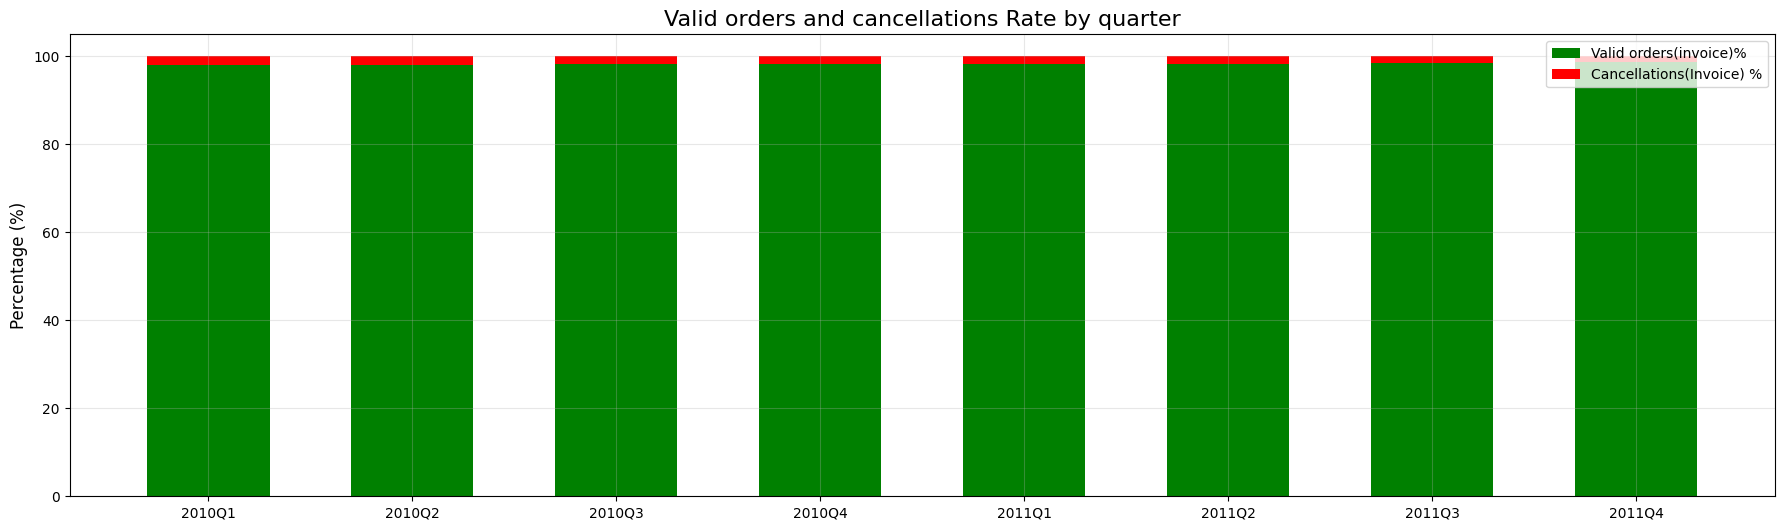

In [74]:
plt.figure(figsize=(22, 6))
bar_width = 0.6
plt.bar(adjusted_cancelled_quarterly_orders_rate.index.astype(str), 100-adjusted_cancelled_quarterly_orders_rate, color='green', label='Valid orders(invoice)%', width=bar_width)
plt.bar(adjusted_cancelled_quarterly_orders_rate.index.astype(str), adjusted_cancelled_quarterly_orders_rate.values, bottom=100-adjusted_cancelled_quarterly_orders_rate, color='red', label='Cancellations(Invoice) %', width=bar_width)
plt.title('Valid orders and cancellations Rate by quarter', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
#plt.tight_layout()
plt.show()

In [76]:
#Cancellation Rate by quarter
cancelled_yearly_orders = filtered_df.groupby('Year')['Invoice'].nunique()
yearly_orders = filtered_dfr.groupby('Year')['Invoice'].nunique()
cancelled_yearly_orders_rate = cancelled_yearly_orders/(cancelled_yearly_orders + yearly_orders) * 100
cancelled_yearly_orders_rate

Year
2010    16.291317
2011    14.406257
Freq: Y-DEC, Name: Invoice, dtype: float64

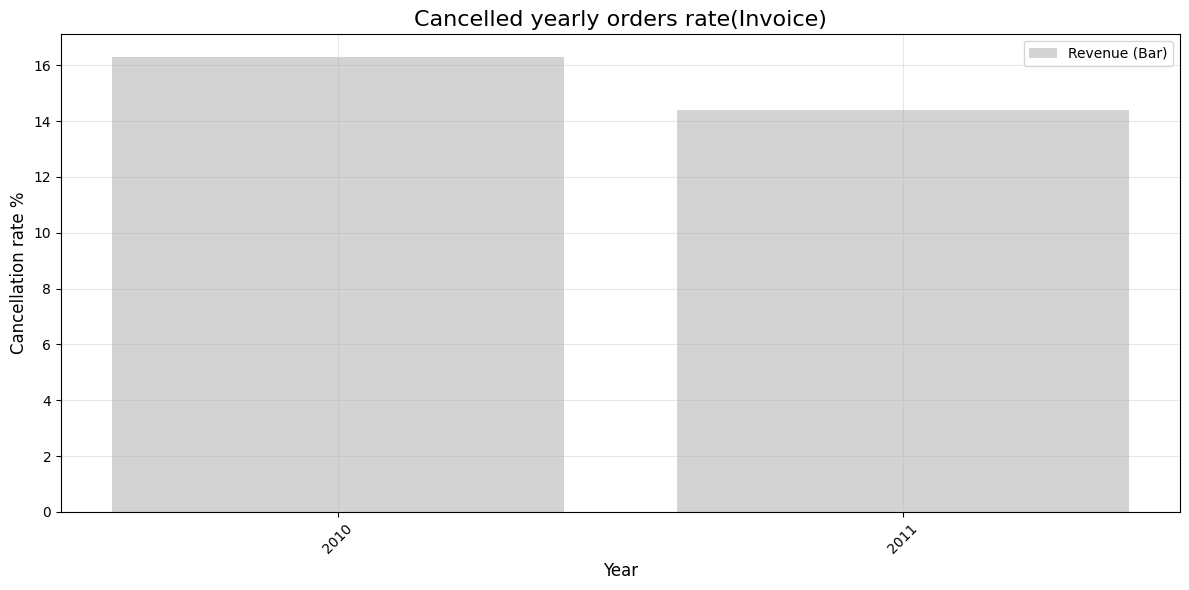

In [78]:
plt.figure(figsize=(12, 6))
plt.bar(cancelled_yearly_orders_rate.index.astype(str), cancelled_yearly_orders_rate.values, color='lightgray', label='Revenue (Bar)')
plt.title('Cancelled yearly orders rate(Invoice)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cancellation rate %', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [80]:
#adjusted Cancellation Rate by year
avg_trans_per_cancellation_by_year = filtered_df.groupby(['Year','Invoice']).size().mean()
print(avg_trans_per_cancellation_by_year)
avg_trans_per_order_by_year = filtered_dfr.groupby(['Year','Invoice']).size().mean()
print(avg_trans_per_order_by_year)
adjusted_cancelled_yearly_orders_rate = (cancelled_yearly_orders*avg_trans_per_cancellation_by_year)/((cancelled_yearly_orders*avg_trans_per_cancellation_by_year) + (yearly_orders*avg_trans_per_order_by_year)) * 100
adjusted_cancelled_yearly_orders_rate

2.3777030976037405
24.6806711516473


Year
2010    1.840429
2011    1.595601
Freq: Y-DEC, Name: Invoice, dtype: float64

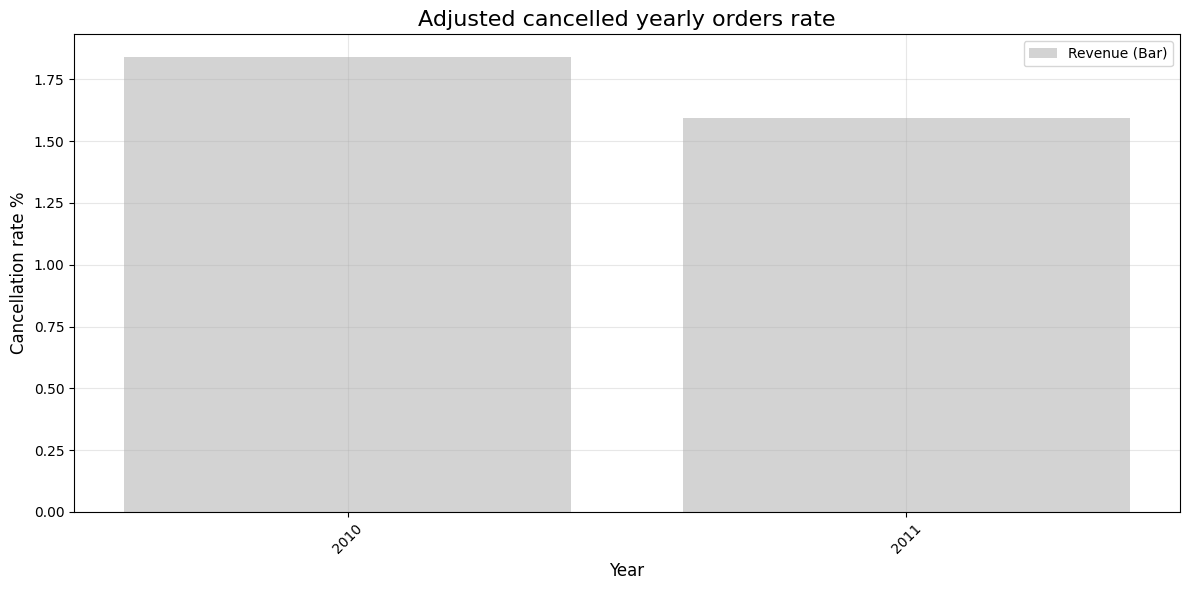

In [82]:
plt.figure(figsize=(12, 6))
plt.bar(adjusted_cancelled_yearly_orders_rate.index.astype(str), adjusted_cancelled_yearly_orders_rate.values, color='lightgray', label='Revenue (Bar)')
plt.title('Adjusted cancelled yearly orders rate', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cancellation rate %', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [84]:
#Revenue Lost to Cancellations
df['Revenue'] = df['Quantity'] * df['Price']
Cancellation_lost_revenue = df['Revenue'].sum()
print(f"Total cancellations lost Revenue: {Cancellation_lost_revenue:.2f}£")

Total cancellations lost Revenue: 256097.23£


In [86]:
#total revenue
dfr['Revenue'] = dfr['Quantity'] * dfr['Price']
total_revenue = dfr['Revenue'].sum()
print(f"Total Revenue: {total_revenue:.2f}£")

Total Revenue: 14283212.07£


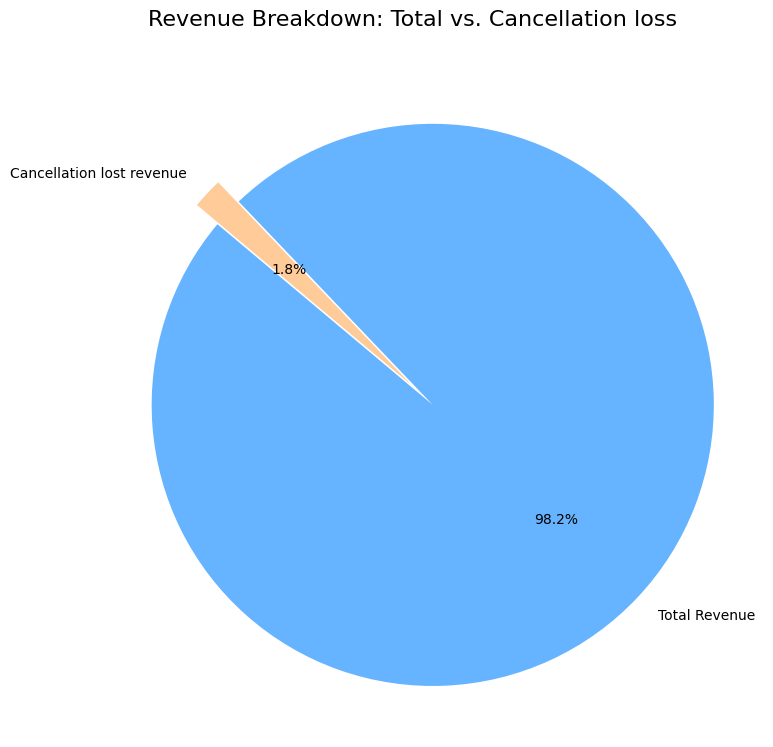

In [88]:
plt.figure(figsize=(8, 8))
plt.pie(
    [total_revenue, Cancellation_lost_revenue],
    labels=['Total Revenue', 'Cancellation lost revenue'],
    autopct='%1.1f%%', 
    startangle=140,    
    colors=['#66b3ff', '#ffcc99'], 
    explode=(0.1, 0)    
)
plt.title('Revenue Breakdown: Total vs. Cancellation loss', fontsize=16)
plt.tight_layout()
plt.savefig('graphs\\Revenue Breakdown Total vs Cancellation loss')
plt.show()